# Taxation in Cagetti & De Nardi (2006)
Before starting this exercise, make sure that you downloaded the updated version of 50_cagettidenardi.jl, 50_cagettidenardi_solve.jl and you looked at the extra slides on market clearing from the same class. Consider a modification of Cagetti & De Nardi (2006) with a richer tax system, as follows:
- We keep the labor income tax from the original version of the model, but will denote it with τl instead of τ .
- Everyone with beginning-of-period assets a pays an τw · a amount of wealth tax.
- A capital income tax with rate τk is applied on capital income. The latter is defined as
    - r · a for non-entrepreneurs, and
    - θkν − δk − r(k − a) for entrepreneurs
- Everyone receives b amount of benefits.
- As in the original model, retired people receive p amount of pension, where p is a fixed fraction of w. This is in addition to b.
- The government balances the budget: Total revenues from the labor income, capital income and wealth taxes should exactly cover expenses on benefits and pension.

Make a copy of 50_cagettidenardi_solve.jl and rename it. Next, in this file:

### 1. 
Modify function solve in a way that it correctly solves for the optimal policy
and value functions of all agents, given this richer tax system.
   - In addition to r and τl, also make τk, τw and b (all Reals) function arguments to the function solve. We don’t put these in EconPars as independent parameters, since we want to solve for the levels balancing the budget (or in the case of r, clear the capital market).
   - Next, amend the budget constraints appropriately for all possible states (old/young, entrepreneur or not). Therefore update all lines computing cash-on-hand (4 such places)

In [8]:
#function solve(ep::EconPars, np::NumPars, r::Real, τ_l::Real, τ_w::Real, τ_k::Real, b::Real; conv_tol=0.0001, maxiter=500)
# 1: retired people
# coh = (1 - τ_k) * (r * assetgrid[i]) + (1 - τ_w) * assetgrid[i] + b + p
# 2: old entrepreneur
# coh = (1 - τ_k) * (θs[θi] * k^ν - δ * k - r*(k - assetgrid[i])) + (1 - τ_w) * assetgrid[i] + b
# 3) young
# coh if enterprise
# ccoh_e = (1 - τ_k) * (θs[θi] * k^ν - δ * k - r*(k - assetgrid[i])) + (1 - τ_w) * assetgrid[i] + b
# coh if being a wage earner
# coh_w = (1 - τ_k) * (r * assetgrid[i]) + (1 - τ_w) * assetgrid[i] + (1 - τ_l) * w * ys[yi] + b

### 2. 
Modify GE_difference such that input x is interpreted as a 5-element vector with elements r, τl, τk, τw and b (instead of just the first two elements). Within the function, compute
 -  the total amount of benefits paid out
 - total tax revenues from capital and wealth taxes
and take into account the corresponding terms in the line defining budget_balance_relative.
It should still give the budget surplus per person, divided by w. 

The output of
the GE_difference should be left unchanged: the 2-element vector it returns
will help us pin down r and one free taxation parameter at a time. 

We will work with four setups. The parameters from 50_cagettidenardi.jl serve as a
benchmark. In the other settings, the government finances b = 0.05 (approximately
1% of average labor earnings) via different taxes. More concretely:
 - Benchmark: r and τl as defined in calib in 50_cagettidenardi.jl. (These
parameters clear the capital market and balance the government budget). The
new taxes and b should all be 0s
Benefit financed by a higher labor income tax: b = 0.05, while the new taxes
are still 0. r and τl are re-estimated to clear the capital market and balance
the government budget.
 -  Benefit financed by capital income tax: b = 0.05, and τl is as in the benchmark.
τw = 0, while the r and τk are re-estimated to clear the capital market and
balance the government budget.
 -  Benefit financed by wealth income tax: b = 0.05, and τl is as in the benchmark.
τk = 0, while the r and τw are re-estimated to clear the capital market and
balance the government budget

In [9]:
# ci = similar(ks) 
# for t in 1:size(ci,2)
#    for n in 1:size(ci,1)
#        if θis[n,t] == 0 # if not entrepreneur
#            ci[n,t] = r * as[n,t]
#        else
#            ci[n,t] = θs[θis[n,t]] * ks[n,t]^ν - δ * ks[n,t] - r * (ks[n,t] - as[n,t])
#        end
#    end
# end
# k_total = sum(ci) # total capital income
# w_total = sum(as) # total wealth
# benefits_total = N_sample * b
# budget_balance_relative = (earnings_total*τ_l + k_total*τ_k + w_total*τ_w - pension_total - benefits_total) / (N_sample * w)

### 3. 
Calibrate the appropriate parameters in all three new settings. Some hints:
 - Use nested_find_zero as in line 21 of 50_cagettidenardi.jl.
 - To do so, you always need bracketing intervals for relevant parameters.
For me, (0.06001, 0.07) worked for r, (0.08, 0.15) worked for τl, (0.0, 0.1) worked for τk, (0.0, 0.01) worked for τw.
 -  We always calibrate two parameters at once (r and a tax) since we have two conditions (capital market and government budget). To write
GE_difference as a function of only two elements of x, while keeping the rest (and the other inputs fixed), one can use an anonymous function such as y− > GE_dif f erence([42, y[1], 21, y[2], 6], otherinputs) as an input of nested_find_zero. Here, y is interpreted as a length two vector, whose elements are used in the positions of your choice of x, while for the other elements of x you can give values you would like.
 -  On my laptop, calibration took around 10 minutes, for each setting


In [1]:
include("50_cagettidenardi_solveA4.jl"); np = NumPars(); ep = EconPars(); b = 0.05; calib = [0.06602,0.10471]  # r, τ_l (b = 0)
(olds, yis, θtrans_shocks) = simulate_shocks(ep::EconPars, np::NumPars, 10000, 1000) # simulate shocks that are used during the root-solving
println(GE_difference([calib[1], calib[2], 0, 0, 0],ep,np,olds,yis,θtrans_shocks))

[0.003418750020585559, 0.0006791427051933911]


In [2]:
# nested_find_zero(y -> GE_difference([y[1], y[2], 0, 0, b],ep,np,olds, yis, θtrans_shocks),  (0.06001,0.07), (0.08,0.15))
laborcalib = [0.06443667459143661, 0.11544654440045463] # r, τ_l
println(GE_difference([laborcalib[1], laborcalib[2], 0, 0, b], ep, np, olds, yis, θtrans_shocks))

didn't converge in 150 iterations
[-0.004124389459341904, 0.0007200008815168021]


In [3]:
# nested_find_zero(y -> GE_difference([y[1], calib[2], y[2], 0.0, 0.05 ],ep, np, olds, yis, θtrans_shocks),  (0.06001,0.07), (0.0,0.1))
capitalcalib = [0.06290095399839181,  0.050396721692878246] # r, τ_k
println(GE_difference([capitalcalib[1], calib[2], capitalcalib[2], 0, b], ep, np, olds, yis, θtrans_shocks))

[-0.0033225644905510165, 0.0005121416797894637]


In [4]:
# nested_find_zero(y -> GE_difference([y[1], calib[2], 0, y[2], b],ep,np,olds, yis, θtrans_shocks),  (0.06001,0.07), (0.0,0.01))
wealthcalib = [0.0627620293814927, 0.008021976857079024] # r, τ_w
println(GE_difference([wealthcalib[1], calib[2], 0, wealthcalib[2], b], ep, np, olds, yis, θtrans_shocks))


[-0.0036088733195061007, 0.0012467546438097014]


### 4. 
After having the right calibrated parameters, solve and simulate all settings.

In [5]:
nobenefit = solve(ep,np,calib[1],calib[2],0,0,0); (olds1, yis1, θis1, ks1, cs1, as1) = simulate(ep, np, nobenefit)
laborbenefit = solve(ep,np,laborcalib[1],laborcalib[2],0,0,b); (olds2, yis2, θis2, ks2, cs2, as2) = simulate(ep, np, laborbenefit)
capitalbenefit = solve(ep,np,capitalcalib[1],calib[2],capitalcalib[2],0,b); (olds3, yis3, θis3, ks3, cs3, as3) = simulate(ep, np, capitalbenefit)
wealthbenefit = solve(ep,np,wealthcalib[1],calib[2],0,wealthcalib[2],b); (olds4, yis4, θis4, ks4, cs4, as4) = simulate(ep, np, wealthbenefit);

didn't converge in 500 iterations


### 5.
 Write a function that takes a Solution structure and matrices containing simulated olds, θis, yis and as as inputs, and gives a correct matrix of simulated value functions as an output, with the same dimensions as the other simulated matrices. (It might be helpful to take a look at how consumption is simulated within simulate_rest). Simulate values in each setting, using the corresponding inputs. Compute the average of simulated values in each setting separately. For any calculations based on simulations, use only simulated figures from the last period.

In [6]:
function simulate_vs(sol::Solution, olds, θis, yis, as)
    N = size(olds,1)
    T = size(olds,2)
    vs = fill(0.0, N, T)
        for t in 2:T
            for n in 1:N
                if olds[n,t]
                    if θis[n,t] == 0
                        vs[n,t] = sol.vfR(as[n,t])
                    else
                        vs[n,t] = sol.vfO[θis[n,t]](as[n,t])
                    end
                else
                    vs[n,t] = sol.vfY[θis[n,t],yis[n,t]](as[n,t])
                end
            end
    end
    return (vs)
end

simulate_vs (generic function with 1 method)

In [7]:
nobenefitvs = simulate_vs(nobenefit, olds1, θis1, yis1, as1); println(mean(nobenefitvs[:,end]))
laborbenefitvs = simulate_vs(laborbenefit, olds2, θis2, yis2, as2); println(mean(laborbenefitvs[:,end]))
capitalbenefitvs = simulate_vs(capitalbenefit, olds3, θis3, yis3, as3); println(mean(capitalbenefitvs[:,end]))
wealthbenefitvs = simulate_vs(wealthbenefit, olds4, θis4, yis4, as4); println(mean(wealthbenefitvs[:,end]))

-5.990402091843159
-5.580969318303463
-5.126135236742837
-5.041841113782776


### 6. 
Compare the benchmark with the case with a benefit financed by higher labor
income tax. 
 -  Which one gives higher average welfare?
How big is the difference
expressed in consumption equivalents?
 -  In class we have seen that a labor income tax is distortive when leisure
provides utility. Is there a reason for it to be distortive in this model? If
yes, what should be the effect on welfare?
 - Are there other channels at work that create a welfare difference between
these two settings?

In [8]:
println(mean(nobenefitvs[:,end]) < mean(laborbenefitvs[:,end]))
println((mean(laborbenefitvs[:,end])/mean(nobenefitvs[:,end]))^(1/(1-1.5))-1)

true
0.15210663787748802


### 7.
How does welfare in the capital income and wealth tax settings relate to the
first two settings? What could be the reason for this difference?

In [9]:
println(mean(nobenefitvs[:,end]) < mean(laborbenefitvs[:,end]) < mean(capitalbenefitvs[:,end]) < mean(wealthbenefitvs[:,end]))

true


### 8.
Now let’s compare the welfare effects across the settings with capital income tax and wealth tax.
-  Which one leads to higher average welfare? Is the difference large?
-   Are the results you find in line with Guvenen at al (2023)?
    - If yes, what common features of the two models drive this finding?
    - If not, what differences between the two models might be responsible?
  
In either case, you might find it helpful to think through how returns  vary across agents in the two models, and how the entrepreneurial sector is linked to wage earners. In the model, you can define return as capital income divided by beginning-of-period wealth. (No need to know the technical details of Guvenen et al, what I said in class is sufficient to answer this question.)

In [10]:
println((mean(wealthbenefitvs[:,end])/mean(capitalbenefitvs[:,end]))^(1/(1-1.5))-1)

0.03371735612577709


In [25]:
returns3 = similar(ks3);  δ= 0.06; ν = 0.82;
    for t in 1:size(ks3, 2)
        for n in 1: size(ks3, 1)
            if ks3[n,t] == 0
                returns3[n,t] = capitalcalib[1]
            else
                returns3[n,t] = (θis3[n,t] * ks3[n,t]^ν - δ * ks3[n,t] - capitalcalib[1] * (ks3[n,t] - as3[n,t]))/as3[n,t]
            end
        end
    end
sqrt(var(returns3[:,end]))

0.3440864829555074

In [26]:
returns3_w = returns3[ks3[:,end].==0,end]; println(median(returns3_w)); 
returns3_e = returns3[ks3[:,end].>0,end]; println(median(returns3_e))
sqrt(var(returns3_e))

0.06290095399839181
1.7354531279326837


1.2336540119728099

In [42]:
returns4 = similar(ks4);  δ= 0.06; ν = 0.82;
    for t in 1:size(ks4, 2)
        for n in 1: size(ks4, 1)
            if ks4[n,t] == 0
                returns4[n,t] = wealthcalib[1]
            else
                returns4[n,t] = (θis4[n,t] * ks4[n,t]^ν - δ * ks4[n,t] - wealthcalib[1] * (ks4[n,t] - as4[n,t]))/as4[n,t]
            end
        end
    end
sqrt(var(returns4[:,end]))

0.32946578453967607

In [41]:
returns4_w = returns4[ks4[:,end].==0,end]; println(median(returns4_w))
returns4_e = returns4[ks4[:,end].>0,end]; println(median(returns4_e))
sqrt(var(returns4_e))


0.0627620293814927
1.7421481575469908


0.8315515336973741

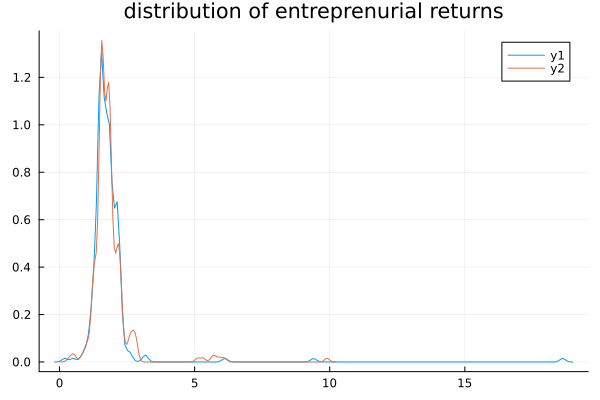

In [40]:
using Plots
density(returns3_e, title = "distribution of entreprenurial returns")
density!(returns4_e)